# 00 Imports & EDA

## Imports

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
# Defining column names via information from email. 
titles = ['name', 'country', 'ticket_price', 'avg_rating', 'genre']

In [3]:
# Read in all excel files. 
data_828 = pd.read_excel('data/DataFile20200828.xlsx', header=None, names=titles)
data_831 = pd.read_excel('data/DataFile20200831.xlsx', header=None, names=titles)
data_901 = pd.read_excel('data/DataFile20200901.xlsx', header=None, names=titles)

In [4]:
# Combine all datasets into one dataframe via pd.concat.
data_combined = pd.concat([data_828, data_831, data_901], join='outer')

In [5]:
data_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 3332
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          9999 non-null   object 
 1   country       9999 non-null   object 
 2   ticket_price  9900 non-null   float64
 3   avg_rating    9999 non-null   float64
 4   genre         9999 non-null   object 
dtypes: float64(2), object(3)
memory usage: 468.7+ KB


In [6]:
data_combined

,name,country,ticket_price,avg_rating,genre
0,d19rpnckGv,Hyrule,1.0935,62.0000,SwordSmithing
1,KaWRtnToJC,Hyrule,0.7481,28.0000,SwordSmithing
2,fJkJTvK9pT,Middle-Earth,0.0437,38.4386,SwordSmithing
3,IbDBE8KYaU,Middle_Earth,0.0417,73.0533,SwordSmithing
4,sBRX9lLull,Hyrule,0.9455,57.3400,Spells
...,...,...,...,...,...
3328,NqQBsiArt,Genosha,131.5168,37.1521,SwordSmithing
3329,G6OInlu5F,Genosha,187.0604,77.8402,Spells
3330,f24B8j0ss,Hyrule,0.9642,69.5299,SwordSmithing
3331,kvGl6XnoF,Mid-Ear,0.0400,22.8600,Spells


In [ ]:
data_combined.loc[data_combined.country == 'Genosha', ]

## EDA

### Check for Typo's in Data

In [7]:
data_combined.genre.unique()

array(['SwordSmithing', 'Spells', 'Mutations', 'Potion_Making'],
      dtype=object)

**No typo's in Genre column.**

In [8]:
data_combined.country.unique()

array(['Hyrule', 'Middle-Earth', 'Middle_Earth', 'Middle\\_Earth',
       'Mid-Ear', 'Genosha'], dtype=object)

**Found a couple of typo's in the country column.**

In [9]:
# Replace values using a dictionary
data_combined.country.replace({'Middle\\_Earth':'Middle_Earth', 
                               'Mid-Ear':'Middle_Earth', 
                               'Middle-Earth':'Middle_Earth'}, inplace=True)

In [10]:
# Checking
data_combined.country.unique()

array(['Hyrule', 'Middle_Earth', 'Genosha'], dtype=object)

**There are now only 3 countries.**

### Check for Dupes

In [11]:
# Checking for duplicate movie names via duplicated(). If there's a duplicate it will return 'True'. 
# Finding all the duplicate posts. There are 132 of them.
data_combined.loc[data_combined.name.duplicated()==True,:]

,name,country,ticket_price,avg_rating,genre
23,5xUIWm4jnH,Middle_Earth,0.0422,47.3764,Spells
25,JqMFZNOId0,Middle_Earth,0.0410,51.1800,Mutations
53,LmijTifuUV,Hyrule,0.9894,59.6746,Mutations
106,kDR3dpTkVC,Hyrule,1.0400,64.5252,Mutations
145,CkGj32GGCu,Hyrule,1.0361,33.6472,Mutations
...,...,...,...,...,...
3082,HEy2Cao2qc,Middle_Earth,0.0445,54.9200,SwordSmithing
3102,UFiifyZ6y1,Hyrule,0.9885,29.9875,SwordSmithing
3127,5Filgaug69,Genosha,157.6355,56.5093,Spells
3255,ldghRbHrf8,Hyrule,1.0123,75.7800,Potion_Making


In [12]:
# Check the duplicate movie names.
data_combined.loc[data_combined.name=='5xUIWm4jnH',:]

,name,country,ticket_price,avg_rating,genre
23,5xUIWm4jnH,Hyrule,0.9589,49.9253,Mutations
23,5xUIWm4jnH,Middle_Earth,0.0422,47.3764,Spells


**Cheked for duplicates in the name section. The same movie was shown in different countries so that explains the duplicates. Therefore I will keep the data in there.**

### Check for Nulls

In [13]:
# Check for nulls
data_combined.isnull().sum()

name             0
country          0
ticket_price    99
avg_rating       0
genre            0
dtype: int64

**There are 99 nulls in the ticket price column.**

In [14]:
# Get all the rows with nulls in ticketprice (only place with nulls)
data_combined.loc[data_combined.ticket_price.isnull() == True, :]

,name,country,ticket_price,avg_rating,genre
19,UE0Ygg6i1m,Middle_Earth,NaN,70.2537,SwordSmithing
142,katuNWNtuw,Hyrule,NaN,42.8697,SwordSmithing
369,cRtvPBIj4F,Hyrule,NaN,27.9900,Spells
631,0uyS2WqHST,Hyrule,NaN,48.5600,Spells
808,Cclr8lUono,Middle_Earth,NaN,49.8600,Mutations
...,...,...,...,...,...
2487,jtv6d4nXp,Hyrule,NaN,20.4800,Mutations
2589,zDtUCO4XH,Hyrule,NaN,49.7800,Potion_Making
2703,k4gcO7DuG,Hyrule,NaN,68.4426,Mutations
2763,CqGZaKz9f,Hyrule,NaN,37.9777,Mutations


**Nulls have to be imputed but not sure how to proceed.**

Have to check for outliers/mean

In [15]:
data_combined.groupby(by='country').describe()

ticket_price                                                  \
                    count          mean           std       min       25%   
country                                                                     
Genosha             497.0  1.398716e+09  1.556169e+10 -213.2527  120.4246   
Hyrule             5941.0  9.216631e+06  9.505584e+07   -1.2845    0.9269   
Middle_Earth       3462.0  4.672733e+05  4.384331e+06   -0.0482    0.0404   

                                               avg_rating             \
                   50%       75%           max      count       mean   
country                                                                
Genosha       142.1965  161.3713  1.838831e+11      498.0  46.464360   
Hyrule          0.9972    1.0684  1.250900e+09     6003.0  51.178704   
Middle_Earth    0.0419    0.0434  4.550000e+07     3498.0  48.942134   

                                                                  
                    std  min       25%      50%       75%    max  
country                                                           
Genosha       19.837544  0.0  33.05000  45.7075  59.64035  100.0  
Hyrule        15.501737  0.0  40.79025  51.2333  61.95425  100.0  
Middle_Earth  14.687657  0.0  38.94000  48.6470  59.00000  100.0

**Obeservations:**

1. There are negative values. Assuming that it's human error on input, the absolute value will be taken. 
2. Genosha has a larger currency value on average than the other two countries. Will have to consider standardizing the prices. 
3. At this point, the nulls have not be imputed and therefore is a difference in total data count. 

#### 1. Removing negative values

In [16]:
# Check for all negative ticket prices.
data_combined.loc[data_combined['ticket_price'] <= 0, :]

,name,country,ticket_price,avg_rating,genre
42,MFsjIY22c8,Genosha,-128.6223,33.4917,SwordSmithing
77,Q04jpRscMu,Middle_Earth,-0.0425,65.0400,SwordSmithing
112,eEa2ZQUVxV,Middle_Earth,-0.0430,55.0000,Mutations
169,O9MEuAZDIR,Middle_Earth,-0.0394,83.6464,Spells
178,kK4umWUVRq,Hyrule,-0.8454,42.9900,Spells
...,...,...,...,...,...
3258,s1xxwolRi,Genosha,-157.6664,55.7200,Potion_Making
3263,boTM4vOZ1,Middle_Earth,-0.0418,74.4341,Spells
3266,taycnnMMK,Middle_Earth,-0.0416,50.9029,Mutations
3268,x3F5nDICl,Hyrule,-1.2058,62.7968,Mutations


**297 cases of negative ticket prices**

In [17]:
# Take absolute value of all ticket prices.
data_combined.ticket_price = abs(data_combined.ticket_price)

In [18]:
# Checking
data_combined.loc[data_combined['ticket_price'] <= 0, :]

,name,country,ticket_price,avg_rating,genre


#### 2. Standardizing Ticket Prices

I found it easiest to split up the datasets back into 3 separate country dataframes. This prevents issues with different currencies until a conversion rate can be determined.

In [19]:
# Splititng up original combined data based on country.
data_g = data_combined.loc[data_combined.country == 'Genosha', :]
data_h = data_combined.loc[data_combined.country == 'Hyrule', :]
data_me = data_combined.loc[data_combined.country == 'Middle_Earth', :]

#### Genosha

In [20]:
data_g.describe()

,ticket_price,avg_rating
count,4.970000e+02,498.000000
mean,1.398716e+09,46.464360
std,1.556169e+10,19.837544
min,6.652700e+01,0.000000
25%,1.227325e+02,33.050000
50%,1.435071e+02,45.707500
75%,1.619428e+02,59.640350
max,1.838831e+11,100.000000


C:\Users\Jason\anaconda3\envs\dsi\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Jason\anaconda3\envs\dsi\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


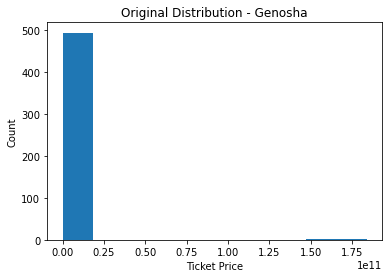

In [21]:
plt.hist(data_g.ticket_price);
plt.title('Original Distribution - Genosha')
plt.ylabel('Count')
plt.xlabel('Ticket Price');

In [22]:
data_g_high = data_g.loc[data_g.ticket_price >= 0.2e9,:]
data_g_low = data_g.loc[data_g.ticket_price < 0.2e9,:]

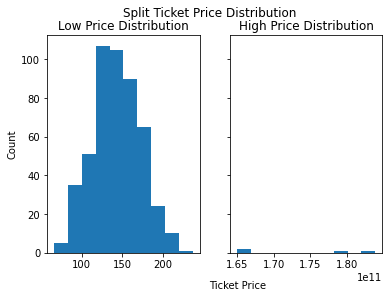

In [23]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True);

plt.suptitle('Split Ticket Price Distribution')
f.text(0.5, 0, 'Ticket Price')

ax1.hist(data_g_low.ticket_price);
ax1.set_title('Low Price Distribution')
ax1.set_ylabel('Count')

ax2.hist(data_g_high.ticket_price);
ax2.set_title('High Price Distribution');

In [24]:
# Adjusting high price outliers to overlap with original distribution.
data_g.ticket_price = data_g.ticket_price.where(data_g.ticket_price < 0.2e9, 
                                                data_g.ticket_price/(1e9))

C:\Users\Jason\anaconda3\envs\dsi\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [25]:
# Checking
data_g.describe()

,ticket_price,avg_rating
count,497.000000,498.000000
mean,143.028709,46.464360
std,28.929982,19.837544
min,66.527000,0.000000
25%,122.732500,33.050000
50%,143.507100,45.707500
75%,161.942800,59.640350
max,235.914200,100.000000


C:\Users\Jason\anaconda3\envs\dsi\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Jason\anaconda3\envs\dsi\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


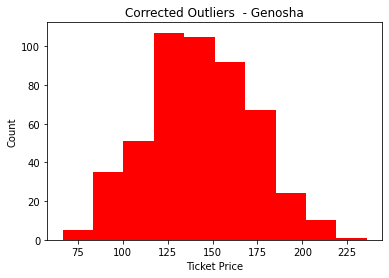

In [26]:
# Plot to check if outliers are adjusted
plt.hist(data_g.ticket_price, color='Red');
plt.title('Corrected Outliers  - Genosha')
plt.xlabel('Ticket Price')
plt.ylabel('Count');

#### Hyrule

In [27]:
data_h.describe()

,ticket_price,avg_rating
count,5.941000e+03,6003.000000
mean,9.216631e+06,51.178704
std,9.505584e+07,15.501737
min,6.052000e-01,0.000000
25%,9.354000e-01,40.790250
50%,1.000700e+00,51.233300
75%,1.070500e+00,61.954250
max,1.250900e+09,100.000000


C:\Users\Jason\anaconda3\envs\dsi\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Jason\anaconda3\envs\dsi\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


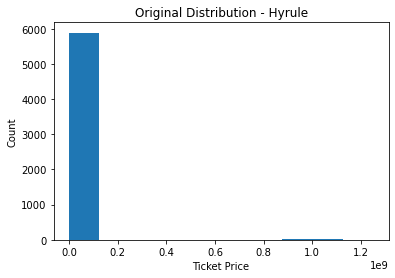

In [28]:
plt.hist(data_h.ticket_price);
plt.title('Original Distribution - Hyrule');
plt.ylabel('Count')
plt.xlabel('Ticket Price');

In [29]:
# Split dataframes into high price point and low price point
data_h_high = data_h.loc[data_h.ticket_price >= 0.6e9,:]
data_h_low = data_h.loc[data_h.ticket_price < 0.6e9,:]

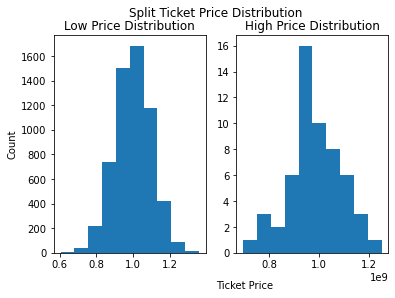

In [30]:
f, (ax1, ax2) = plt.subplots(1, 2);

plt.suptitle('Split Ticket Price Distribution')
f.text(0.5, 0, 'Ticket Price')

ax1.hist(data_h_low.ticket_price);
ax1.set_title('Low Price Distribution')
ax1.set_ylabel('Count')

ax2.hist(data_h_high.ticket_price);
ax2.set_title('High Price Distribution');

In [31]:
# Adjusting high price outliers to overlap with original distribution.
data_h.ticket_price = data_h.ticket_price.where(data_h.ticket_price < 0.6e9, 
                                                data_h.ticket_price/(1e9))

C:\Users\Jason\anaconda3\envs\dsi\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [32]:
data_h.describe()

,ticket_price,avg_rating
count,5941.000000,6003.000000
mean,1.000616,51.178704
std,0.099027,15.501737
min,0.605200,0.000000
25%,0.934300,40.790250
50%,0.999200,51.233300
75%,1.068200,61.954250
max,1.358500,100.000000


C:\Users\Jason\anaconda3\envs\dsi\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Jason\anaconda3\envs\dsi\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


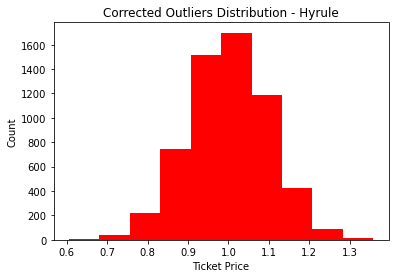

In [33]:
# Checking original distribution with corrected outliers
plt.hist(data_h.ticket_price, color='Red');
plt.title('Corrected Outliers Distribution - Hyrule')
plt.xlabel('Ticket Price')
plt.ylabel('Count');

#### Middle Earth

In [34]:
data_me.describe()

,ticket_price,avg_rating
count,3.462000e+03,3498.000000
mean,4.672733e+05,48.942134
std,4.384331e+06,14.687657
min,3.480000e-02,0.000000
25%,4.060000e-02,38.940000
50%,4.200000e-02,48.647000
75%,4.340000e-02,59.000000
max,4.550000e+07,100.000000


C:\Users\Jason\anaconda3\envs\dsi\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Jason\anaconda3\envs\dsi\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


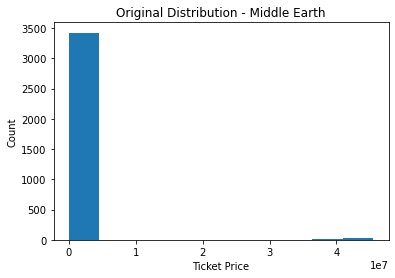

In [35]:
plt.hist(data_me.ticket_price);
plt.title('Original Distribution - Middle Earth')
plt.ylabel('Count')
plt.xlabel('Ticket Price');

In [36]:
# Split dataframes into high price point and low price point
data_me_high = data_me.loc[data_me.ticket_price >= 1e7,:]
data_me_low = data_me.loc[data_me.ticket_price < 1e7,:]

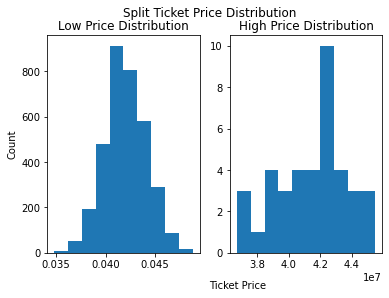

In [37]:
f, (ax1, ax2) = plt.subplots(1, 2);

plt.suptitle('Split Ticket Price Distribution')
f.text(0.5, 0, 'Ticket Price')

ax1.hist(data_me_low.ticket_price);
ax1.set_title('Low Price Distribution')
ax1.set_ylabel('Count')

ax2.hist(data_me_high.ticket_price);
ax2.set_title('High Price Distribution');

In [38]:
# Adjusting high price outliers to overlap with original distribution.
data_me.ticket_price = data_me.ticket_price.where(data_me.ticket_price < 1e7, 
                                                  data_me.ticket_price/(1e9))

C:\Users\Jason\anaconda3\envs\dsi\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [39]:
data_me.describe()

,ticket_price,avg_rating
count,3462.000000,3498.000000
mean,0.041970,48.942134
std,0.002092,14.687657
min,0.034800,0.000000
25%,0.040600,38.940000
50%,0.042000,48.647000
75%,0.043400,59.000000
max,0.048800,100.000000


C:\Users\Jason\anaconda3\envs\dsi\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Jason\anaconda3\envs\dsi\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


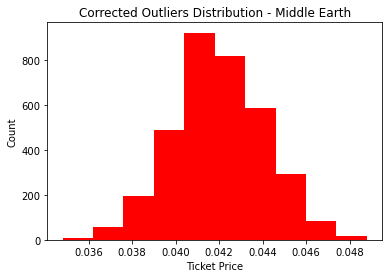

In [40]:
plt.hist(data_me.ticket_price, color='Red');
plt.title('Corrected Outliers Distribution - Middle Earth')
plt.xlabel('Ticket Price')
plt.ylabel('Count');

In [41]:
# Mean for low data
print(data_g_low.ticket_price.mean())
print(data_h_low.ticket_price.mean())
print(data_me_low.ticket_price.mean())

142.77912068965514
1.0008329141886134
0.041975430908559666


In [53]:
# Mean for individual countries 
print(f'Genosha: {data_g.ticket_price.mean()}')
print(f'Hyrule: {data_h.ticket_price.mean()}')
print(f'Middle Earth: {data_me.ticket_price.mean()}')

Genosha: 143.02870905432596
Hyrule: 1.0006156707624951
Middle Earth: 0.04196984402079717


#### 3. Imputing Null Values with Mean

In [51]:
data_combined.isnull().sum()

name             0
country          0
ticket_price    99
avg_rating       0
genre            0
dtype: int64

In [43]:
# Fill nulls with country-specific mean values. 
data_g.fillna(data_g.ticket_price.mean(), inplace=True)
data_h.fillna(data_h.ticket_price.mean(), inplace=True)
data_me.fillna(data_me.ticket_price.mean(), inplace=True)

C:\Users\Jason\anaconda3\envs\dsi\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [44]:
data_g.isnull().sum()

name            0
country         0
ticket_price    0
avg_rating      0
genre           0
dtype: int64

In [45]:
data_h.isnull().sum()

name            0
country         0
ticket_price    0
avg_rating      0
genre           0
dtype: int64

In [46]:
data_me.isnull().sum()

name            0
country         0
ticket_price    0
avg_rating      0
genre           0
dtype: int64

In [47]:
# Concat individual country dataframes into singular df.
data_combined_clean = pd.concat([data_g, data_h, data_me], join='outer')

In [48]:
data_combined_clean.sample(10)

,name,country,ticket_price,avg_rating,genre
2332,jzcewwGkd,Hyrule,1.0350,55.7300,Mutations
1998,Gqy3jwQ3yj,Hyrule,0.7576,36.0000,Spells
700,S2XRc0Dx3,Middle_Earth,0.0400,66.9400,Potion_Making
2004,X2c0LWrztg,Hyrule,1.1358,58.1500,SwordSmithing
3001,iNfFfYdtgV,Middle_Earth,0.0382,65.9800,Spells
38,EsBilQzAzG,Middle_Earth,0.0382,52.0714,Spells
1393,cj2dpAlVh,Hyrule,1.0501,62.2814,Potion_Making
2289,HRQeiF8U8,Hyrule,0.9494,49.4900,Spells
1209,603HB8Y4t,Middle_Earth,0.0434,48.4600,Mutations
926,NW5MzKEjE,Hyrule,0.9791,34.0300,Spells


In [49]:
data_combined_clean.describe()

,ticket_price,avg_rating
count,9999.000000,9999.000000
mean,7.738954,50.161476
std,31.641805,15.527353
min,0.034800,0.000000
25%,0.043100,39.652350
50%,0.935400,50.061300
75%,1.043000,60.686950
max,235.914200,100.000000


### Export to CSV

In [50]:
data_g.to_csv('Data/data_genosha_clean')
data_h.to_csv('Data/data_hyrule_clean')
data_me.to_csv('Data/data_middle_earth_clean')

data_combined_clean.to_csv('Data/data_combined_clean')

### Alternate Way to Determine Outliers

Worked through together with Alex, Katy, and Tim. Utilizes the median and 25% and 75% quartiles to identify outliers.

In [18]:
# Sourced from notebook 01. 
def groupby_country_genre_df(country_genre):
    if (country_genre == 'Genosha') or (country_genre == 'Hyrule') or (country_genre == 'Middle_Earth'):
        return data_combined.groupby(by='country').get_group(country_genre)
    elif (country_genre == 'SwordSmithing') or (country_genre == 'Spells') or (country_genre == 'Mutations') or (country_genre == 'Potion_Making'):
        return data_combined.groupby(by='genre').get_group(country_genre)
    else:
        return print('Check Spelling')

In [11]:
z = groupby_country_genre_df('Genosha')
z.describe()

,ticket_price,avg_rating
count,4.970000e+02,498.000000
mean,1.398716e+09,46.464360
std,1.556169e+10,19.837544
min,-2.132527e+02,0.000000
25%,1.204246e+02,33.050000
50%,1.421965e+02,45.707500
75%,1.613713e+02,59.640350
max,1.838831e+11,100.000000


In [22]:
# Distance from Median
z['median_difference'] = z.ticket_price - z.ticket_price.median()

C:\Users\Jason\anaconda3\envs\dsi\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
# Identify distance from IQR (25/75)
z['distance'] = z.median_difference / 39.077950000000016

C:\Users\Jason\anaconda3\envs\dsi\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
z.sort_values('distance')

,name,country,ticket_price,avg_rating,genre,median_difference,distance
1160,d0ZNWI0CPF,Genosha,-2.132527e+02,84.9083,Spells,-3.554492e+02,-9.095902e+00
741,6OZDbQska,Genosha,-2.078951e+02,94.0000,Spells,-3.500916e+02,-8.958802e+00
87,i8VzxGvzL,Genosha,-1.710219e+02,70.7954,Potion_Making,-3.132184e+02,-8.015221e+00
58,A3eJTLaeM2,Genosha,-1.612311e+02,59.0000,Spells,-3.034276e+02,-7.764675e+00
3174,jIsUfd1UR,Genosha,-1.591786e+02,63.0000,Mutations,-3.013751e+02,-7.712152e+00
...,...,...,...,...,...,...,...
2166,kI0VQFKel,Genosha,1.649376e+11,61.6600,Spells,1.649376e+11,4.220733e+09
1828,lxxc94IvZ,Genosha,1.663422e+11,67.7100,SwordSmithing,1.663422e+11,4.256677e+09
2389,eadL40qYJ,Genosha,1.799990e+11,76.7512,Mutations,1.799990e+11,4.606153e+09
1513,f6dVqKVCM,Genosha,1.838831e+11,78.6900,Mutations,1.838831e+11,4.705546e+09


In [23]:
# Ticket prices with a distance of over 5 from IQR
z_greater = z.loc[abs(z.distance) > 5,:]
z_greater.sort_values('distance')

,name,country,ticket_price,avg_rating,genre,median_difference,distance
1160,d0ZNWI0CPF,Genosha,-2.132527e+02,84.9083,Spells,-3.554492e+02,-9.095902e+00
741,6OZDbQska,Genosha,-2.078951e+02,94.0000,Spells,-3.500916e+02,-8.958802e+00
87,i8VzxGvzL,Genosha,-1.710219e+02,70.7954,Potion_Making,-3.132184e+02,-8.015221e+00
58,A3eJTLaeM2,Genosha,-1.612311e+02,59.0000,Spells,-3.034276e+02,-7.764675e+00
3174,jIsUfd1UR,Genosha,-1.591786e+02,63.0000,Mutations,-3.013751e+02,-7.712152e+00
3258,s1xxwolRi,Genosha,-1.576664e+02,55.7200,Potion_Making,-2.998629e+02,-7.673455e+00
1183,V0NucamQ9w,Genosha,-1.484270e+02,45.5976,Mutations,-2.906235e+02,-7.437020e+00
334,0XaLuylcA,Genosha,-1.470482e+02,48.3100,Mutations,-2.892447e+02,-7.401737e+00
2897,Plq0GUu8r,Genosha,-1.434903e+02,52.2486,Mutations,-2.856868e+02,-7.310691e+00
1692,zn4mmBfbG,Genosha,-1.434563e+02,51.6300,Mutations,-2.856528e+02,-7.309820e+00
